<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as po

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [62]:
data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [63]:
data.head()

Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...   
4  Москва , не готова к переезду , готова к коман...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   
2                                   полная занятость   
3  частичная занятость, проектная работа, полная ...   
4                                   полная занятость   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   
2                                        полный день   
3                    гибкий график, удаленная работа   
4                                        полный день   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   
2  Опыт работы 10 лет 3 месяца  Октябрь 2004 — Де...   
3  Опыт работы 18 лет 9 месяцев  Август 2017 — Ап...   
4  Опыт работы 5 лет 7 месяцев  Региональный мене...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   
2                    ПАО Сбербанк   
3                        OpenSoft   
4                        Мармелад   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   
2                               Кассир-операционист   
3                               Инженер-программист   
4                              Менеджер по продажам   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   
1  Высшее образование 1981  Военно-космическая ак...  12.04.2019 08:42   
2  Среднее специальное образование 2002 Профессио...  16.04.2019 08:35   
3  Высшее образование 2002  Саратовский государст...  08.04.2019 14:23   
4  Высшее образование 2015 Кгу Психологии и педаг...  22.04.2019 10:32   

                             Авто  
0  Имеется собственный автомобиль  
1                      Не указано  
2                      Не указано  
3                      Не указано  
4                      Не указано

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [64]:
print(data.shape)
print(data.dtypes)
print(data.isna().sum())

(44744, 12)
Пол, возраст                       object
ЗП                                 object
Ищет работу на должность:          object
Город, переезд, командировки       object
Занятость                          object
График                             object
Опыт работы                        object
Последнее/нынешнее место работы    object
Последняя/нынешняя должность       object
Образование и ВУЗ                  object
Обновление резюме                  object
Авто                               object
dtype: object
Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dt

5. Выведите основную статистическую информацию о столбцах.


In [65]:
print(data.describe(include='all').T)
print('Сколько уникальных значений содержится в столбце «Опыт работы»?', data['Опыт работы'].nunique())
print('Какая из искомых должностей самая распространённая? Введите название.', data['Ищет работу на должность:'].mode()[0])

                                 count unique  \
Пол, возраст                     44744  16003   
ЗП                               44744    690   
Ищет работу на должность:        44744  14929   
Город, переезд, командировки     44744  10063   
Занятость                        44744     38   
График                           44744     47   
Опыт работы                      44576  44413   
Последнее/нынешнее место работы  44743  30214   
Последняя/нынешняя должность     44742  16927   
Образование и ВУЗ                44744  40148   
Обновление резюме                44744  18838   
Авто                             44744      2   

                                                                               top  \
Пол, возраст                         Мужчина ,  32 года , родился 17 сентября 1986   
ЗП                                                                      50000 руб.   
Ищет работу на должность:                                  Системный администратор   
Город, переезд, ко

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [66]:
def get_education(education):
    first_word, second_word, *words = education.split(' ')

    if first_word == 'Неоконченное':
        return 'неоконченное высшее'
    if first_word == 'Высшее':
        return 'высшее'
    if first_word == 'Среднее' and second_word == 'специальное':
        return 'среднее специальное'
    return 'среднее'

data['Образование'] = data['Образование и ВУЗ'].apply(get_education)
print('Сколько соискателей имеет средний уровень образования (школьное образование)?', data[data['Образование'] == 'среднее'].shape[0])

Сколько соискателей имеет средний уровень образования (школьное образование)? 559


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [ ]:
data['Пол'] = data['Пол, возраст'].apply(lambda x: "Ж" if x.split(' , ')[0] == 'Женщина' else 'М')
data['Возраст'] = data['Пол, возраст'].apply(lambda x: int(x.split(' , ')[1].split(' ')[1]))
data.drop(columns=['Пол, возраст', 'Образование и ВУЗ'])

women_resume = data[data['Пол'] == 'Ж'].shape[0] / data.shape[0] * 100
print('Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых.', round(women_resume, 2))
print('Чему равен средний возраст соискателей? Ответ округлите до десятых.', data['Возраст'].mean())

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [37]:
def get_work_length(value):
    if pd.notna(value) and value != 'Не указано':
        words = value.split('Опыт работы ')[1].split(' ')
        months = 0

        if words[1] in ('лет', 'год', 'года'):
            months += int(words[0]) * 12
        else:
            months += int(words[0])

        if words[3] in ('месяцев', 'месяца', 'месяц'):
            months += int(words[2])

        return months

    return np.nan

data['Опыт работы (месяц)'] = data['Опыт работы'].apply(get_work_length)
data.drop(columns=['Опыт работы'])
print('Чему равен медианный опыт работы (в месяцах) в нашей таблице?', data['Опыт работы (месяц)'].median())

Чему равен медианный опыт работы (в месяцах) в нашей таблице? 100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [38]:
def get_city(value):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    self_cities = ['Москва', 'Санкт-Петербург']

    city = value.split(' ')[0]

    if city in self_cities:
        return city

    if city in million_cities:
        return 'город-миллионник'

    return 'другие'

data['Город'] = data['Город, переезд, командировки'].apply(get_city)
data['Готовность к переезду'] = data['Город, переезд, командировки'].apply(lambda x: False if x.split(' , ')[1].startswith('не') else True)
data['Готовность к командировкам'] = data['Город, переезд, командировки'].apply(lambda x: True if len(x.split(' , ')) > 2 and x.split(' , ')[2].startswith('готов') else False)
data.drop(columns=['Город, переезд, командировки'])

st_petersburg_citizen = data[data['Город'] == 'Санкт-Петербург'].shape[0] / data.shape[0] * 100
print('Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.', int(st_petersburg_citizen))
people_ready = data[(data['Готовность к переезду'] == True) & data['Готовность к командировкам'] == True].shape[0] / data.shape[0] * 100
print('Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.', int(people_ready))

Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого. 11
Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого. 32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [39]:
data['полная занятость'] = data['Занятость'].apply(lambda x: True if 'полная занятость' in x else False)
data['частичная занятость'] = data['Занятость'].apply(lambda x: True if 'частичная занятость' in x else False)
data['проектная работа'] = data['Занятость'].apply(lambda x: True if 'проектная работа' in x else False)
data['стажировка'] = data['Занятость'].apply(lambda x: True if 'стажировка' in x else False)
data['волонтерство'] = data['Занятость'].apply(lambda x: True if 'волонтерство' in x else False)
data['вахтовый метод'] = data['График'].apply(lambda x: True if 'вахтовый метод' in x else False)
data['гибкий график'] = data['График'].apply(lambda x: True if 'гибкий график' in x else False)
data['полный день'] = data['График'].apply(lambda x: True if 'полный день' in x else False)
data['сменный график'] = data['График'].apply(lambda x: True if 'сменный график' in x else False)
data['удаленная работа'] = data['График'].apply(lambda x: True if 'сменный график' in x else False)
data.drop(columns=['Занятость', 'График'])

print('Сколько людей ищут проектную работу и волонтерство (в обоих столбцах стоит True)?', data[(data['проектная работа'] == True) & (data['волонтерство'] == True)].shape[0])
print('Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?', data[(data['вахтовый метод'] == True) & (data['гибкий график'] == True)].shape[0])

Сколько людей ищут проектную работу и волонтерство (в обоих столбцах стоит True)? 436
Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)? 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [40]:
exchange_data = pd.read_csv('data/ExchangeRates.csv')
exchange_data.head()

data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме'], format='%d.%m.%Y %H:%M').dt.date
exchange_data['date'] = pd.to_datetime(exchange_data['date'], format='%d/%m/%y').dt.date
data['ЗП сумма'] = data['ЗП'].apply(lambda x: x.split(' ')[0])
data['ЗП валюта'] = data['ЗП'].apply(lambda x: x.split(' ')[1])

def get_iso_currency(value):
    if value == 'руб.':
        return 'RUB'
    if value == 'бел.руб.':
        return 'BYN'
    if value == 'грн.':
        return 'UAH'
    if value == 'сум':
        return 'UZS'

    return value

data['ЗП валюта'] = data['ЗП валюта'].apply(get_iso_currency)
data['ЗП валюта'].value_counts()
exchange_data[exchange_data['currency'] == 'RUB']['close'] = 1
merged = pd.merge(
    left=data,
    right=exchange_data,
    how='left',
    left_on=['ЗП валюта', 'Обновление резюме'],
    right_on=['currency', 'date']
)
merged[merged['ЗП валюта'] != 'RUB'].head()
def get_salary(row):
    if row['ЗП валюта'] == 'RUB':
        return row['ЗП сумма']
    else:
        return row['ЗП сумма'] * row['close'] / row['proportion']

merged['ЗП сумма'] = merged['ЗП сумма'].apply(float)
merged['ЗП (руб)'] = merged.apply(get_salary, axis=1)
merged.head()
merged.drop(columns=['vol', 'close', 'proportion', 'per', 'date', 'time', 'currency', 'ЗП валюта', 'ЗП сумма'], inplace=True)
merged.drop(columns=['ЗП', 'Пол, возраст', 'Город, переезд, командировки', 'Образование и ВУЗ', 'Занятость'], inplace=True)
merged.drop(columns=['Опыт работы', 'График'], inplace=True)

print('Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?', merged['ЗП (руб)'].median())

Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)? 59019.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [41]:
hist_fig = px.histogram(merged, x='Возраст', nbins=20, marginal='box', title='Распределение возраста')
box_fig = px.box(merged, y='Возраст', points='all', title='Распределение возраста')
hist_fig.write_html("plotly/hist_fig_age.html")
box_fig.write_html("plotly/box_fig_age.html")
hist_fig.show()
box_fig.show()

Чему равна мода распределения? 30

Каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей?
Минимальный возраст: 14 лет
Максимальный возраст: 100 лет
1-й квартиль (25%): 27.0 лет
Медиана (50%): 31.0 лет
3‑й квартиль (75%): 36.0 лет
Большинство кандидатов (≈50 %) находятся в диапазоне 27–36 лет.

Есть ли аномалии для данного признака? Если есть, то какие значения вы бы причислили к таковым?
Есть - возраст 100 и 14 лет. в 15 лет можно работать, в 77 человек еще может сохранять трудоспособность. В теории 100 это тоже нормально тк есть даже хирурги которые проводили операции в 100 лет, например, Фёдор Углов. C 14 еще нельзя официально работать.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [42]:
hist_fig = px.histogram(merged, x='Опыт работы (месяц)', nbins=20, marginal='box', title='Распределение опыта работы')
box_fig = px.box(merged, y='Опыт работы (месяц)', points='all', title='Распределение опыта работы')
hist_fig.write_html("plotly/hist_fig_work_exp.html")
box_fig.write_html("plotly/box_fig_work_exp.html")
hist_fig.show()
box_fig.show()

Чему равна мода распределения? 81.0


Каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей?
Минимальный опыт: 1.0 мес.
Максимальный опыт: 1188.0 мес.
1‑й квартиль: 57.0 мес.
Медиана: 100.0 мес.
3‑й квартиль: 154.0 мес.

Большинство кандидатов имеют опыт в диапазоне 57–154 месяцев.

Есть ли аномалии для признака? Если есть, то какие значения вы бы причислили к таковым?
Да. 1188 месяцев, это 99 лет, учитывая что опыт работы идет минимум с окончания школы это ~15 лет, то человеку должно быть 114 лет.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [56]:
hist_fig = px.histogram(merged, x='ЗП (руб)', nbins=150, marginal='box', title='Распределение зарплаты')
box_fig = px.box(merged, y='ЗП (руб)', points='all', title='Распределение зарплаты')
hist_fig.write_html("plotly/hist_fig_salary.html")
box_fig.write_html("plotly/box_fig_salary.html")
hist_fig.show()
box_fig.show()

Чему равна мода распределения?
50_000

Каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей?
Минимальная зарплата: 1.0 руб.
Максимальная зарплата: 24_304_876.0 руб.
1‑й квартиль: 37082.2 руб.
Медиана: 59_019.0 руб.
3‑й квартиль: 95_000.0 руб.

Большинство кандидатов имеют предпочтение в зп в диапазоне 37_082–95_000 месяцев.

Есть ли аномалии для признака заработной платы? Если есть, то какие значения вы бы причислили к таковым?
Есть - 7.6 млн, 24млн. С другой стороны есть менеджеры крупных компаний, которые зарабатывают больше 24 млн в месяц. Например, Игорь Сечин "Роснефть". Также зарплата меньше 1000 рублей.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [57]:
zp_data = merged[merged['ЗП (руб)'] < 1_000_000].groupby('Образование')['ЗП (руб)'].median()

fig = px.bar(zp_data.reset_index()
           .sort_values('ЗП (руб)', ascending=False),
             x='Образование',
             y='ЗП (руб)',
             text='ЗП (руб)',
             title='Медианная желаемая зарплата по уровню образования',
             labels={'ЗП (руб)': 'Медиана ЗП, руб.', 'Образование': 'Уровень образования'},
             color='Образование',
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.write_html("plotly/bar_fig_education.html")
fig.show()

Для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы?
Больший для высшего, меньший среднее и среднее-специальное

Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?
Важен тк высококвалифицированные специалисты, имеющие образование, будут требовать более высокую зарплату.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [58]:
fig = px.box(merged[merged['ЗП (руб)'] < 1_000_000],
             x='Город',
             y='ЗП (руб)',
             points="all",
             title='Box‑plot желаемой зарплаты по городам',
             labels={'Город': 'Город', 'ЗП (руб)': 'Желаемая ЗП, руб.'},
             color='Город')
fig.write_html("plotly/box_fig_cities.html")
fig.show()

Как соотносятся медианные уровни желаемой заработной платы и их размах в городах?

                   median       q25       q75       IQR
Город
Москва            85000.0  60000.00  150000.0  90000.00 <br>
Санкт-Петербург   60000.0  44772.14   85000.0  40227.86 <br>
город-миллионник  40000.0  30000.00   60000.0  30000.00 <br>
другие            40000.0  30000.00   60000.0  30000.00 <br>

Как вы считаете, важен ли признак города при прогнозировании заработной платы?
Важен, например, в Москве и Санкт-Петербурге зарплаты сильно выше чем в регионах.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [46]:
median_salary = merged.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()

fig = px.bar(
    median_salary,
    x='Готовность к переезду',
    y='ЗП (руб)',
    color='Готовность к командировкам',
    barmode='group',
    text='ЗП (руб)',
    title='Медианная зарплата',
    labels={'Готовность к переезду': 'Готовность к переезду',
            'Готовность к командировкам': 'Готовность к командировкам',
            'Медиана ЗП': 'Медиана ЗП, руб.'},
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig.write_html("plotly/bar_fig_median_salary.html")
fig.show()

Те, кто готов к переезду получают больше тех кто не готов. Готовность к командировкам не имеет явного влияния.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [59]:
median_salary = merged.groupby(['Возраст', 'Образование'], as_index=False)['ЗП (руб)'].median()

pivot = median_salary.pivot(index='Возраст',
                          columns='Образование',
                          values='ЗП (руб)')

print(pivot.head())

fig = px.imshow(pivot,
                labels=dict(x="Образование", y="Возраст", color="ЗП (руб)"),
                x=pivot.columns,
                y=pivot.index,
                color_continuous_scale='YlGnBu',
                aspect='auto')
fig.write_html("plotly/fig_salary_by_education_and_age.html")
fig.show()

Образование     высшее  неоконченное высшее  среднее  среднее специальное
Возраст                                                                  
14            60000.00                  NaN      NaN                  NaN
15                 NaN                  NaN  10000.0               2000.0
16           122582.49                  NaN      NaN              30000.0
17            90075.50              80000.0  44000.0              25000.0
18            30000.00              25000.0  35000.0              25151.0


В целом, с возрастом платят меньше. Больше всего платят соискателям с высшим образованием.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [60]:
merged['Опыт работы (годы)'] = (merged['Опыт работы (месяц)'] / 12).round(2)
fig = px.scatter(merged, x='Возраст', y='Опыт работы (годы)', title='Связь возраста и опыта работы')
fig.add_trace(po.Scatter(x=[0, 100], y=[0, 100], mode='lines'))
fig.write_html("plotly/scatter_fig_age_experience.html")
fig.show()

above_line = merged[merged['Опыт работы (годы)'] > merged['Возраст']]
print(f'Число точек, лежащих строго выше линии: {len(above_line)}')

Число точек, лежащих строго выше линии: 7


Все значения, что пересекают прямую являются аномальными тк опыт работы не может быть равен возрасту.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [49]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их.

In [50]:
dup_count = merged[merged.duplicated()]
print(dup_count.shape)
merged_unique = merged.drop_duplicates()
print(merged_unique.shape)

(161, 24)
(44583, 24)


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах.

In [51]:
merged_unique.isna().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
стажировка                           0
волонтерство                         0
вахтовый метод                       0
гибкий график                        0
полный день                          0
сменный график                       0
удаленная работа                     0
ЗП (руб)                             0
Опыт работы (годы)                 168
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [52]:
resume_data = merged_unique.dropna(subset=['Последнее/нынешнее место работы',
            'Последняя/нынешняя должность'], how='any')
resume_data.isna().sum()
resume_data.drop(columns=['Опыт работы (годы)'], inplace=True)
resume_data = resume_data.fillna(value={ 'Опыт работы (месяц)': resume_data['Опыт работы (месяц)'].median() })
resume_data.isna().sum()

/var/folders/5g/pty12q510gsffs8890n9hlpw0000gq/T/ipykernel_51989/2393546328.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Ищет работу на должность:          0
Последнее/нынешнее место работы    0
Последняя/нынешняя должность       0
Обновление резюме                  0
Авто                               0
Образование                        0
Пол                                0
Возраст                            0
Опыт работы (месяц)                0
Город                              0
Готовность к переезду              0
Готовность к командировкам         0
полная занятость                   0
частичная занятость                0
проектная работа                   0
стажировка                         0
волонтерство                       0
вахтовый метод                     0
гибкий график                      0
полный день                        0
сменный график                     0
удаленная работа                   0
ЗП (руб)                           0
dtype: int64

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [53]:
print(resume_data['Опыт работы (месяц)'].mean())
clean_data = resume_data[(resume_data['ЗП (руб)'] <= 1_000_000) & (resume_data['ЗП (руб)'] >= 1_000)]
print(clean_data.shape)
print(resume_data.shape)
print(resume_data.shape[0] - clean_data.shape[0])

114.35777573405711
(44492, 23)
(44581, 23)
89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [54]:
mask = clean_data['Опыт работы (месяц)'] / 12 <= clean_data['Возраст']
clean_data_2 = clean_data[mask]
clean_data.shape[0] - clean_data_2.shape[0]

7

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

0.4523422276053838
Количество найденных выбросов: 3


Ищет работу на должность: Последнее/нынешнее место работы  \
31137  Менеджер по работе с клиентами           ООО "ФёрстКэшКомпани"   
32950                 Тестировщик игр                        OOO ЖМЫХ   
33654            Frontend-разработчик                       Freelance   

         Последняя/нынешняя должность Обновление резюме        Авто  \
31137  Менеджер по работе с клиентами        2019-04-06  Не указано   
32950                  Тестировщик ПО        2019-04-09  Не указано   
33654            Frontend-разработчик        2019-04-19  Не указано   

               Образование Пол  Возраст  Опыт работы (месяц)            Город  \
31137              среднее   М       15                  2.0  Санкт-Петербург   
32950  среднее специальное   М       15                  3.0           другие   
33654  среднее специальное   М      100                 30.0  Санкт-Петербург   

       ...  частичная занятость  проектная работа  стажировка  волонтерство  \
31137  ...                 True             False       False         False   
32950  ...                False             False       False         False   
33654  ...                 True              True        True         False   

       вахтовый метод  гибкий график  полный день  сменный график  \
31137           False           True        False            True   
32950           False          False         True           False   
33654           False           True         True           False   

       удаленная работа  ЗП (руб)  
31137              True   10000.0  
32950             False    2000.0  
33654             False   60000.0  

[3 rows x 23 columns]

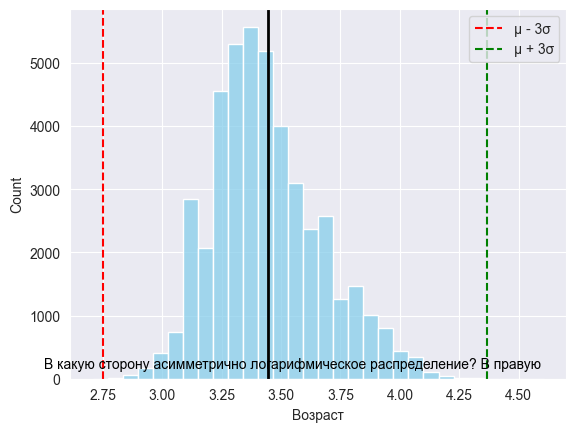

In [55]:
log_age = np.log(clean_data_2['Возраст'])
ax = sns.histplot(data=log_age, bins=30, kde=False, color='skyblue')

print(log_age.skew())
mean_log = log_age.mean()
sigma = log_age.std()

ax.annotate('text', xy=(10, 10))
ax.axvline(mean_log, color='k', lw=2)
ax.axvline(mean_log - 3 * sigma, color='r', ls='--', lw=1.5,
           label='μ - 3σ')
ax.axvline(mean_log + 4 * sigma, color='g', ls='--', lw=1.5,
           label='μ + 3σ')

comment = 'В какую сторону асимметрично логарифмическое распределение? В правую'
ax.text(0.95, 0.02, comment,
        transform=ax.transAxes,
        fontsize=10,
        color='black',
        ha='right', va='bottom')

ax.legend()

def get_outliers_z_score(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]

    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma

    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, df_cleaned = get_outliers_z_score(clean_data_2, 'Возраст', log_scale=True, left=3, right=4)

print(f"Количество найденных выбросов: {outliers.shape[0]}")
display(outliers)

В какую сторону асимметрично логарифмическое распределение? В правую

с каким возрастом соискатели попадают под категорию выбросов? 15 и 100 лет